随机0-1的小数 [0.99403766 0.18210338 0.65536916 0.02803328 0.94274847 0.36912771
 0.96050301 0.7131868  0.03911107 0.74386526]
随机0-9的数 3
x [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]
x [array([0.65536916]), array([2.99403766]), array([4.65536916]), array([6.18210338]), array([8.36912771]), array([10.18210338]), array([12.02803328]), array([14.94274847]), array([16.96050301]), array([18.94274847]), array([20.99403766]), array([22.94274847]), array([24.18210338]), array([26.36912771]), array([28.03911107]), array([30.7131868]), array([32.36912771]), array([34.7131868]), array([36.94274847]), array([38.02803328])]
y [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y [[1.36255270e-01]
 [1.87451070e+00]
 [4.11291897e+00]
 [1.33617237e+01]
 [1.63144183e+01]
 [2.52811186e+01]
 [3.63371852e+01]
 [6.33696082e+01]
 [7.00422987e+01]
 [9.43459978e+01]
 [1.03675229e+02]
 [1.21861973e+02]
 [1.44673584e+02]
 [1.73767849e+02]
 [2.16477866e+02]
 [2.25841784e+02]
 [2.77401322e+

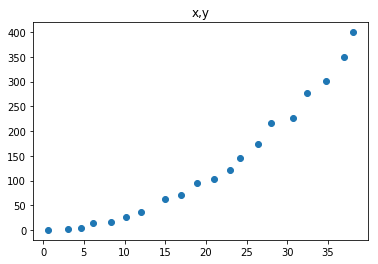

KeyboardInterrupt: 

In [7]:
#线性回归
import numpy
import matplotlib.pyplot as plt

randfloat=numpy.random.rand(10)
print("随机0-1的小数",randfloat)
index=numpy.random.randint(0,9,1)
print("随机0-9的数",index[0])

x=2*numpy.arange(20)

print("x",x)
x=[i+randfloat[numpy.random.randint(0,9,1)] for i in x]
print("x",x)


y=numpy.arange(20)
print("y",y)
y=[i+randfloat[numpy.random.randint(0,9,1)] for i in y]
y=numpy.square(y)
print("y",y)

plt.figure()
plt.scatter(x,y)
plt.title("x,y")
plt.show()

x=numpy.array(x).astype(numpy.float32)
y=numpy.array(y).astype(numpy.float32)
# 利用torch做线性回归
import torch
import torch.nn  as nn
from torch.autograd import Variable

class Lrm(nn.Module):
    def __init__(self, input_size, output_size):
        super(Lrm, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, xx):
        out = self.linear(xx)
        return out
input_size = 1
output_size = 3
lrm = Lrm(input_size, output_size).cuda()


learning_rate = 1e-3

# 误差函数
criterion=nn .MSELoss()
optimizer=torch.optim.SGD(lrm.parameters(),lr=learning_rate)

epoch=0
# 训练1000次
while True: 
    inputs=Variable(torch.from_numpy(x)).cuda()
    targets=Variable(torch.from_numpy(y)).cuda()
    # 注意每次迭代都需要清零
    optimizer.zero_grad()
    # 向前传播
    outputs=lrm(inputs)
    loss=criterion(outputs,targets)
    # 向后传播
    loss.backward()
    optimizer.step()
    epoch+=1
    if loss <learning_rate: 
      break
        
lrm.eval()

# 绘制原数据集
plt.plot(x, y, 'ro')
# 绘制预测
xx=numpy.array([numpy.array([50]).astype(numpy.float32),numpy.array([60]).astype(numpy.float32)])

predicted = lrm(Variable(torch.from_numpy(xx)).cuda())
predicted=predicted.data.cpu().numpy()
plt.plot(xx, predicted, label='predict')
plt.legend()
plt.show()

# 打印结果
print("predicted",(xx[0],predicted[0]),(xx[-1],predicted[-1]))